In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn import datasets

import pandas as pd

Preprossing:
1. find the similarity matrix
2. find the points are cores and for epsilone's neighbours
3. cluster and 

In [191]:
tf_vec = TfidfVectorizer(stop_words='english',use_idf=False)
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')
Xtrain = tf_vec.fit_transform(train.data)
Xtest = tf_vec.transform(test.data)

In [192]:
dist_mat = cosine_distances(Xtest)

In [193]:
np.std(dist_mat[0])

0.04497493305584236

In [194]:
dist_mat.shape

(7532, 7532)

In [195]:
len(test.target_names)

20

In [196]:
y_test = test.target
y_train = train.target

Sklearn.DBSCAN

In [314]:
%%time
db = DBSCAN(eps = 1.2,min_samples= 40).fit(Xtest)
y_pred = db.labels_.copy().tolist()

y_true = y_test.copy().tolist()
pred_true = []
for p,t in zip(y_pred,y_true):
    pred_true.append((p,t))


CPU times: user 2.54 s, sys: 456 ms, total: 3 s
Wall time: 3.04 s


In [315]:
Counter(pred_true)

Counter({(-1, 0): 97,
         (-1, 1): 263,
         (-1, 2): 180,
         (-1, 3): 212,
         (-1, 4): 202,
         (-1, 5): 288,
         (-1, 6): 187,
         (-1, 7): 202,
         (-1, 8): 179,
         (-1, 9): 190,
         (-1, 10): 173,
         (-1, 11): 155,
         (-1, 12): 238,
         (-1, 13): 243,
         (-1, 14): 151,
         (-1, 15): 210,
         (-1, 16): 91,
         (-1, 17): 162,
         (-1, 18): 95,
         (-1, 19): 76,
         (0, 0): 222,
         (0, 1): 126,
         (0, 2): 214,
         (0, 3): 180,
         (0, 4): 183,
         (0, 5): 107,
         (0, 6): 203,
         (0, 7): 194,
         (0, 8): 219,
         (0, 9): 207,
         (0, 10): 226,
         (0, 11): 241,
         (0, 12): 155,
         (0, 13): 153,
         (0, 14): 243,
         (0, 15): 188,
         (0, 16): 273,
         (0, 17): 214,
         (0, 18): 215,
         (0, 19): 175})

In [309]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [28]:
metrics.homogeneity_score(y_test,labels)

0.018879618605662406

In [29]:
metrics.adjusted_rand_score(y_test,labels)

-2.2484317875763432e-07

In [65]:
len(db.labels_) == len(y_test)

True

In [66]:
%%time
param_grid = {'eps': [0.1, 0.5, 0.75, 1,2,3]}
grid_search = GridSearchCV(db,param_grid=param_grid,scoring='homogeneity_score')

CPU times: user 446 µs, sys: 741 µs, total: 1.19 ms
Wall time: 1.2 ms


In [67]:
%%time
homogeneity_score = []
for ep in [0.1, 0.5, 0.75, 1,2,3]:
    labels = DBSCAN(eps = ep).fit(Xtest).labels_
    homogeneity_score.append(metrics.homogeneity_score(y_test,labels))

CPU times: user 17.8 s, sys: 4.59 s, total: 22.3 s
Wall time: 28 s


In [ ]:
set(labels)

In [68]:
homogeneity_score

[-1.902806091432664e-16,
 0.0006557957149602982,
 0.0126479814394593,
 0.15410641140417872,
 -1.902806091432664e-16,
 -1.902806091432664e-16]

In [ ]:
DB

In [65]:
%%time
homogeneity_score = []
for ep in np.arange(0.75,1.5,0.1):
    labels = DBSCAN(eps = ep).fit(Xtest).labels_
    homogeneity_score.append((metrics.homogeneity_score(y_test,labels),ep))

CPU times: user 20.3 s, sys: 4.66 s, total: 25 s
Wall time: 26 s


In [ ]:
homogeneity_score

[(0.0126479814394593, 0.75),
 (0.035200081751137514, 0.85),
 (0.099629015113978, 0.95),
 (0.23382934865648283, 1.0499999999999998),
 (0.16016593813837163, 1.15),
 (0.02559457994774485, 1.25)]

In [ ]:
%%time
homogeneity_score = []
for ep in np.arange(1,1.25,0.01):
    labels = DBSCAN(eps = ep,n_jobs = -1).fit(Xtest).labels_
    homogeneity_score.append((metrics.homogeneity_score(y_test,labels),ep))

Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiproc

In [ ]:
homogeneity_score

In [ ]:
db = DBSCAN(eps = 1.13)
db.get_params

In [ ]:
%%time 
homogeneity_score = []
for msp in np.arange(1,20):
    labels = DBSCAN(eps = 1.13,min_samples=msp).fit(Xtest).labels_
    homogeneity_score.append((metrics.homogeneity_score(y_test,labels),msp))

In [ ]:
homogeneity_score

In [ ]:
%%time
homogeneity_score = []
for ep in np.arange(1.08,1.15,0.001):
    labels = DBSCAN(eps = ep).fit(Xtest).labels_
    homogeneity_score.append((metrics.homogeneity_score(y_test,labels),ep))

In [ ]:
maxHomogeneityScore = homogeneity_score[0][0]
i = 0
for x,y in homogeneity_score:
    if x > maxHomogeneityScore:
        maxHomogeneityScore = x


In [ ]:
maxHomogeneityScore
# (0.297155066686532, 1.1229999999999953),

Try cosine distance matric, while the similarity matrix should be calculated by cos

In [ ]:
dbCosine = DBSCAN(metric='cosine').fit(Xtest)

In [ ]:
%%time
for ep in np.arange(0.1,1,0.1):
    dbCosine = DBSCAN(eps=ep,metric='cosine').fit(Xtest)
    labels = dbCosine.labels_
    homoScore = metrics.homogeneity_score(labels,y_test)
    adjRandScore = metrics.adjusted_mutual_info_score(labels,y_test)
    completeScore = metrics.completeness_score(labels,y_test)
    print('ep is',ep,'homoScore is:',homoScore,'adjRandScore is ',adjRandScore,'completeScore is',completeScore)

In [ ]:
dbCosine = DBSCAN(eps = 0.8, metric = 'cosine').fit(Xtest)

In [ ]:
metrics.homogeneity_score(dbCosine.labels_,y_test)

In [ ]:
metrics.adjusted_rand_score(dbCosine.labels_,y_test)

Explorary on Train set

In [ ]:
%%time
homogeneity_score = []
for ep in np.arange(0.75,1.5,0.1):
    labels = DBSCAN(eps = ep).fit(Xtrain).labels_
    homogeneity_score.append((metrics.homogeneity_score(y_train,labels),ep))

In [ ]:
homogeneity_score

Do the homework 2

In [ ]:
%%time
kmeans = KMeans(n_clusters= 20, n_init=3,init = 'k-means++',n_jobs = -1,precompute_distances=True)

In [ ]:
%%time
kmeans.fit(Xtrain)

In [ ]:
%%time
homoScore = []
for it in np.arange(1,50,3):
    kmeans = MiniBatchKMeans(n_clusters=10, init = 'k-means++', max_iter=it,random_state=10).fit(Xtrain)
    print('generating...it = ',it)
    labels = kmeans.labels_
    homoScore.append(metrics.homogeneity_score(labels,y_train))

In [ ]:
plt.plot(np.arange(1,50,3),homoScore)
#no way to analysis the naive approach of kmeans, and the minibatchkmeans is unstable(cannot reproduce)

In [ ]:
metrics.homogeneity_score(kmeans.labels_,y_train)

DBSCAN 

In [2]:
centers = [[1,1],[-1,-1]]
#XToy, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
#                            random_state=0)

Xcircles,ycircles = datasets.make_circles(n_samples=1000, factor=.5,
                                      noise=.05,random_state=0)
Xmoons,ymoons = datasets.noisy_moons = datasets.make_moons(n_samples=1500, noise=.05,random_state=0)

Xblobs,yblobs = datasets.make_blobs(n_samples= 1500, centers=centers, cluster_std = 0.4, random_state=0)

In [24]:
circle  = {'Xcircle_X1':Xcircles[:,0],'Xcircle_X2':Xcircles[:,1]}
moons = {'Xmoons_X1':Xmoons[:,0],'Xmoons_X2':Xmoons[:,1]}
blobs = {'Xblobs_X1':Xblobs[:,0],'Xblobs_X2':Xblobs[:,1]}

In [25]:
circledf = pd.DataFrame(circle)
moonsdf = pd.DataFrame(moons)
blobsdf = pd.DataFrame(blobs)

In [35]:
circledf.to_csv('/Users/wenyikuang/Desktop/circle.csv',index=False)
moonsdf.to_csv('/Users/wenyikuang/Desktop/moons.csv',index = False)
blobsdf.to_csv('/Users/wenyikuang/Desktop/blobs.csv',index = False)

In [30]:
circle = pd.read_csv('/Users/wenyikuang/Desktop/circle.csv')

Readme of these three datasets:
For example, in 'circle.csv', [Xcircle_X1,Xcircle_X2] are the features of each data points.
[Xcircle_X1[0],Xcircle_X2[0]] is the data point.

For each data sets, we are asking for:
1. draw the distribution of dataset
2. run the DBSCAN from sklearn and find the best parameter to cluster the dataset, and color each point by your cluster labels.
3. Implement your own DBSCAN, run it on these three datases and color them.

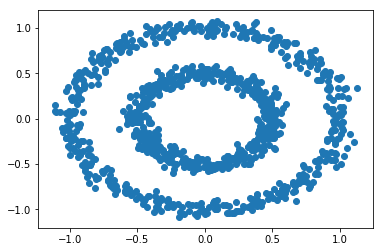

In [34]:
plt.scatter(circle['Xcircle_X1'],circle['Xcircle_X2'])

In [54]:
# TO-DO:
# find all the core points
#     find the relationship between epsilon and similarity matrix, like, how to defin the function eps = f(sim)
#     

In [66]:
def RangeQuery(dis_mat, eps, Q):
    Neighbors = np.ix_(dis_mat[Q] < eps)[0]
    #print('Here is neierbors of',Q,'  ',Neighbors)
    return Neighbors

In [67]:
def growCluster(dis_mat,labels,p,C,eps,minPts,Neighbors):
    labels[p] = C
    i = 0
    while i < len(Neighbors):
        q = Neighbors[i]
        if labels[q] == -1:
            labels[q] = C
        elif labels[q] == 0:
            labels[q] = C
            qNeighbors = RangeQuery(dis_mat, eps, q).tolist()
            if len(qNeighbors) >= minPts:
                Neighbors = Neighbors + qNeighbors
        i += 1
    return labels

In [68]:
def implementedDBSCAN(X, eps = 0.18, minPts = 3, distance = 'euclidean_distances'):
    '''
    rtype: y_pred, a list of predict labels of each point.
    '''
    labels = {}
    for i in range(X.shape[0]):
        labels[i] = 0
    C = 0
    if distance == 'euclidean_distances':
        dis_mat = euclidean_distances(X)
    if distance == 'cosine_distances':
        dis_mat = cosine_distances(X)
    for p in range(0, X.shape[0]):
        if not (labels[p] == 0):
            continue
        Neighbors = RangeQuery(dis_mat, eps, p).tolist()
        if len(Neighbors) < minPts:
            labels[p] = -1
        else:
            C += 1
            labels = growCluster(dis_mat,labels,p,C,eps,minPts,Neighbors)
    y_pred = [v for k,v in labels.items()]
    return y_pred

In [69]:
def paintingCluster(X,y_pred):
    xCoor = []
    yCoor = []
    
    for x,y in X:
        xCoor.append(x)
        yCoor.append(y)
    plt.scatter(xCoor,yCoor,c = y_pred)

CPU times: user 126 ms, sys: 83.5 ms, total: 210 ms
Wall time: 332 ms


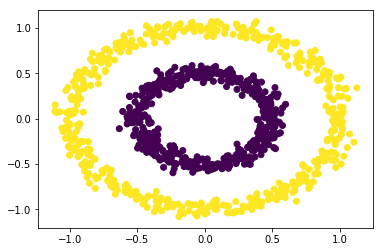

In [316]:
%%time
y_pred = implementedDBSCAN(X=Xcircles,eps=0.18,minPts=3)
paintingCluster(Xcircles,y_pred)

CPU times: user 54.6 ms, sys: 7.54 ms, total: 62.1 ms
Wall time: 64.6 ms


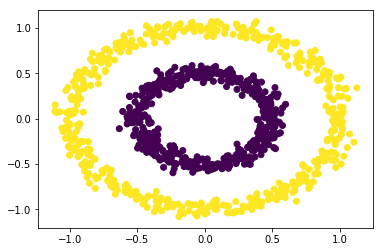

In [317]:
%%time
SklearnDB = DBSCAN(eps= 0.18, min_samples=3).fit(Xcircles)
y_pred = SklearnDB.labels_
paintingCluster(Xcircles,y_pred)

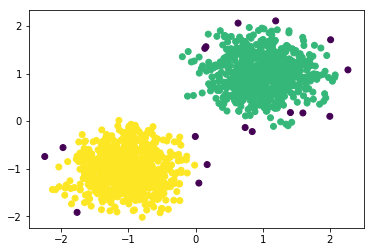

In [51]:
y_pred = implementedDBSCAN(X=Xblobs,eps=0.18,minPts=3)
paintingCluster(Xblobs,y_pred)

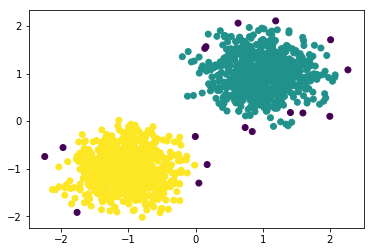

In [52]:
SklearnDB = DBSCAN(eps= 0.18, min_samples=3).fit(Xblobs)
y_pred = SklearnDB.labels_
paintingCluster(Xblobs,y_pred)

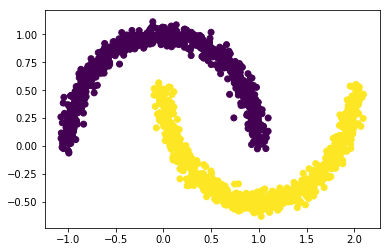

In [53]:
y_pred = implementedDBSCAN(X=Xmoons,eps=0.18,minPts=3)
paintingCluster(Xmoons,y_pred)

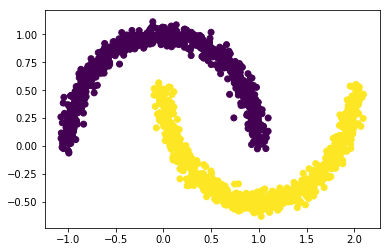

In [54]:
SklearnDB = DBSCAN(eps= 0.18, min_samples=3).fit(Xmoons)
y_pred = SklearnDB.labels_
paintingCluster(Xmoons,y_pred)